Data Exploration

In [88]:
pip install folium


   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/108.4 kB ? eta -:--:--
   ------- ------------------------------- 20.5/108.4 kB 165.2 kB/s eta 0:00:01
   ----------- --------------------------- 30.7/108.4 kB 163.8 kB/s eta 0:00:01
   ----------- --------------------------- 30.7/108.4 kB 163.8 kB/s eta 0:00:01
   ---------------------- ---------------- 61.4/108.4 kB 233.8 kB/s eta 0:00:01
   ------------------------- ------------- 71.7/108.4 kB 231.8 kB/s eta 0:00:01
   -------------------------------------- 108.4/108.4 kB 314.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/83.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/83.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/83.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/83.9 kB ? eta -:--:--
   -----------------------

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review          

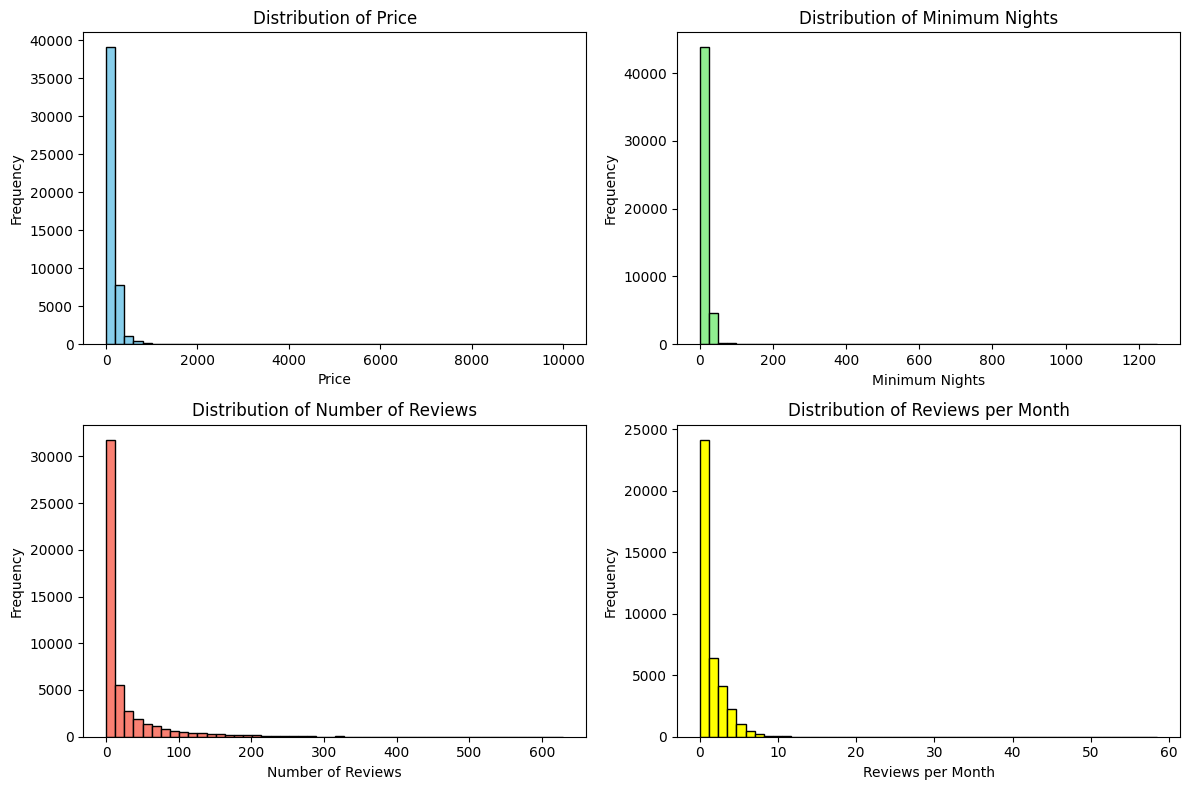

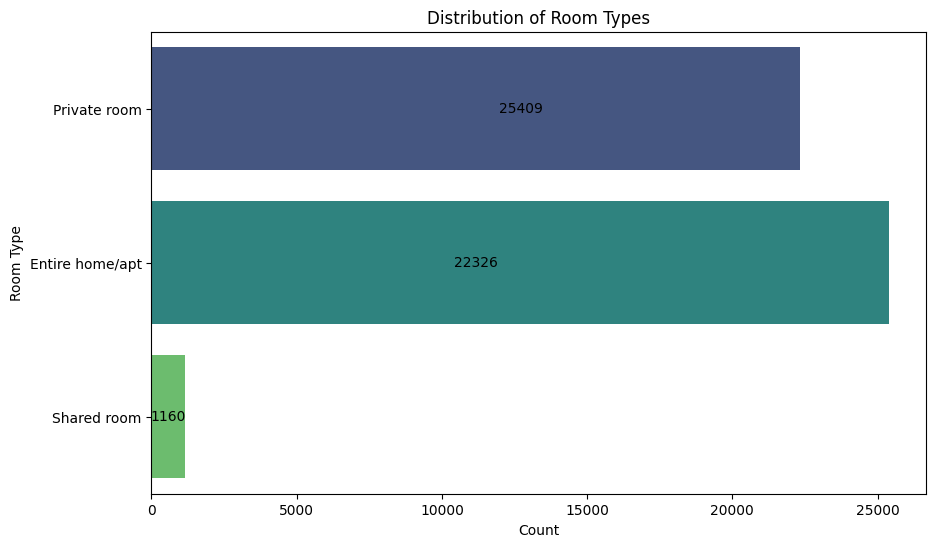

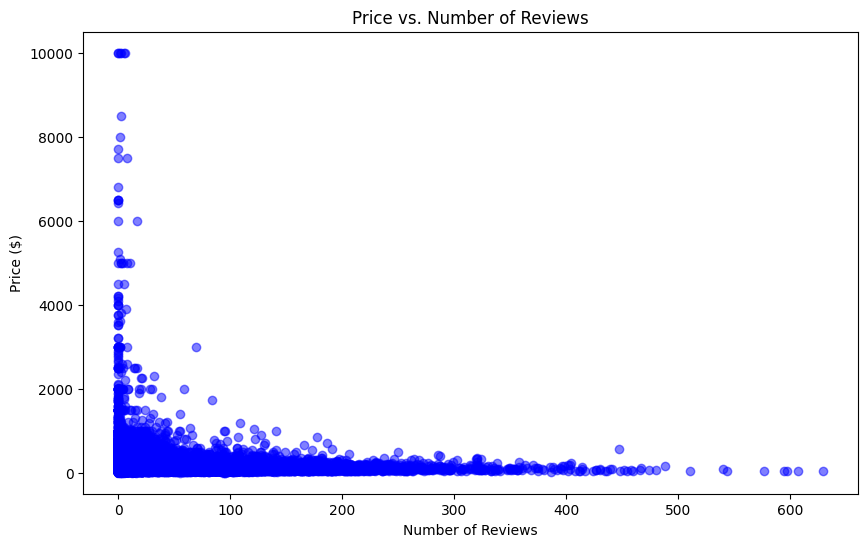

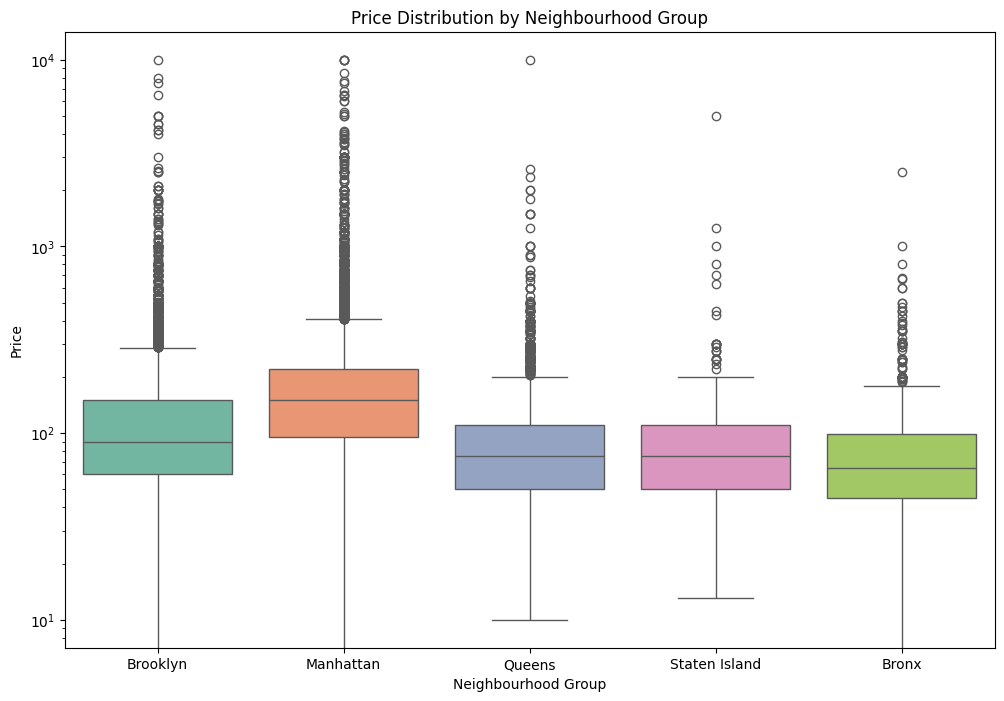

C:\Users\a.hatem\AppData\Local\Temp\ipykernel_16776\279103407.py:84: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['last_review'] = pd.to_datetime(data['last_review'])


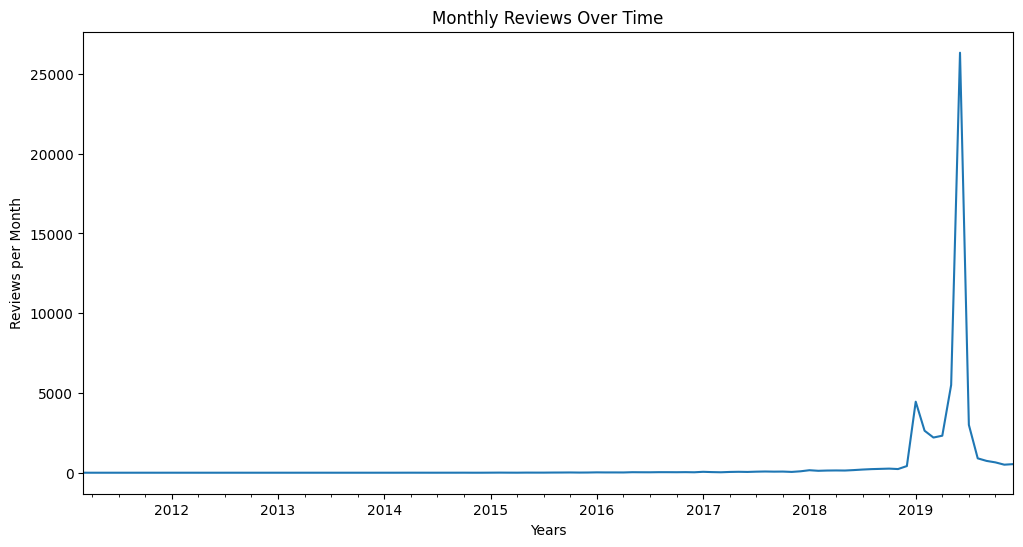

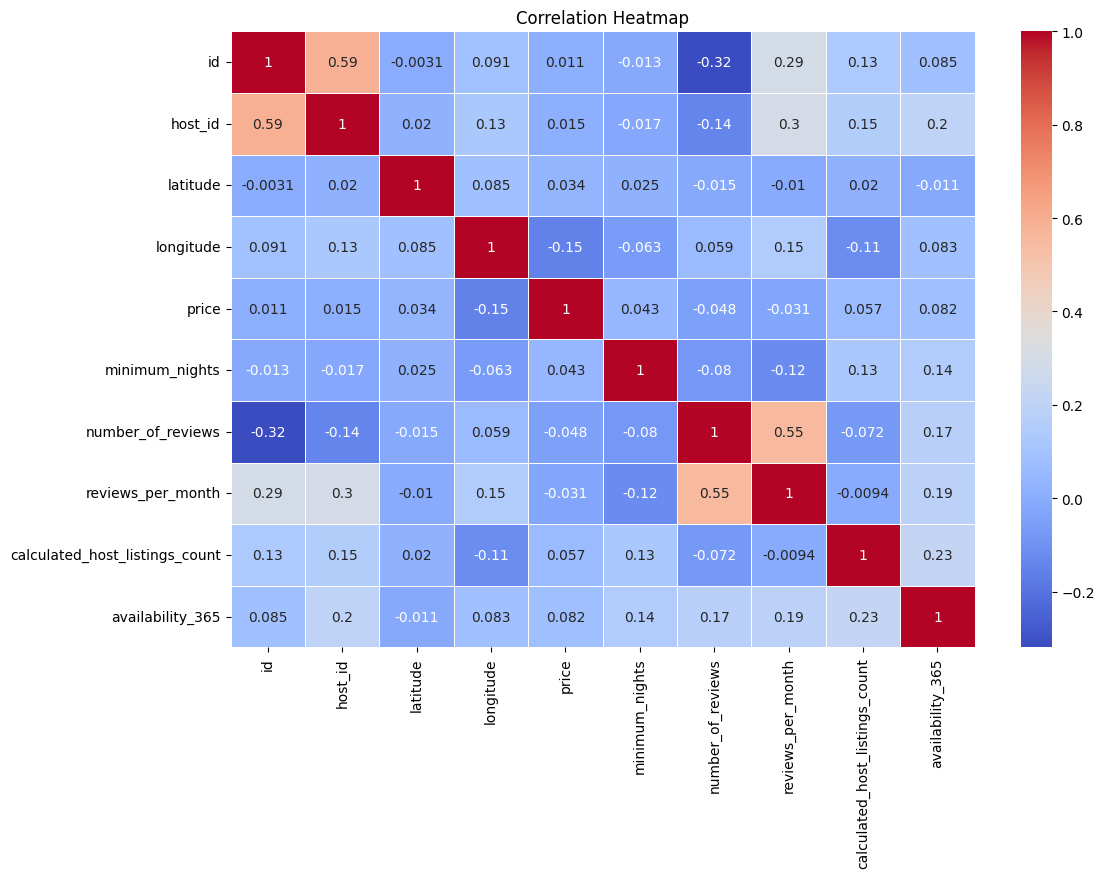

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap


# Load the dataset
file_path = r'C:\Users\a.hatem\Desktop\MS\DP\AB_NYC_2019.csv'
data = pd.read_csv(file_path)

# Display basic information and descriptive statistics
print("Data Info:")
print(data.info())
print("\nData Description:")
print(data.describe())

# 1. Summary Statistics
summary_stats = data.describe()
print("\nDetailed Summary Statistics:")
print(summary_stats)

# 2. Histograms for Numerical Variables
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.hist(data['price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(data['minimum_nights'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribution of Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(data['number_of_reviews'], bins=50, color='salmon', edgecolor='black')
plt.title('Distribution of Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(data['reviews_per_month'].dropna(), bins=50, color='yellow', edgecolor='black')
plt.title('Distribution of Reviews per Month')
plt.xlabel('Reviews per Month')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 3. Bar Chart for Room Type Distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='room_type', hue='room_type', data=data, palette='viridis', legend=False)
plt.title('Distribution of Room Types')
plt.xlabel('Count')
plt.ylabel('Room Type')
# Annotate the bars with the count in the middle of the bars
for index, value in enumerate(data['room_type'].value_counts()):
    ax.text(value / 2, index, f'{value}', color='black', ha="center", va="center", fontsize=10)

plt.show()

# 4. Scatter Plot for Price vs. Number of Reviews
plt.figure(figsize=(10, 6))
plt.scatter(data['number_of_reviews'], data['price'], alpha=0.5, c='blue')
plt.title('Price vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price ($)')
plt.show()

# 5. Box Plot for Price Across Different Neighbourhood Groups
plt.figure(figsize=(12, 8))
sns.boxplot(x='neighbourhood_group', y='price', hue='neighbourhood_group', data=data, palette='Set2', legend=False)
plt.title('Price Distribution by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.yscale('log')
plt.show()

# 6. Time Series Analysis
# Convert last_review to datetime
data['last_review'] = pd.to_datetime(data['last_review'])

# Group by month and year to analyze trends
monthly_reviews = data.set_index('last_review').resample('ME')['reviews_per_month'].sum()

# Plot the time series
plt.figure(figsize=(12, 6))
monthly_reviews.plot()
plt.title('Monthly Reviews Over Time')
plt.xlabel('Years')
plt.ylabel('Reviews per Month')
plt.show()

# 7. Price Heatmaps
# Prepare data for heatmap
heat_data = [[row['latitude'], row['longitude'], row['price']] for index, row in data.iterrows()]

# Create a heatmap
map_ = folium.Map(location=[40.7128, -74.0060], zoom_start=10)
HeatMap(heat_data).add_to(map_)

# 8. Correlation Heatmap
# Filter out non-numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Data Cleaning

Missing Values in Each Column:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


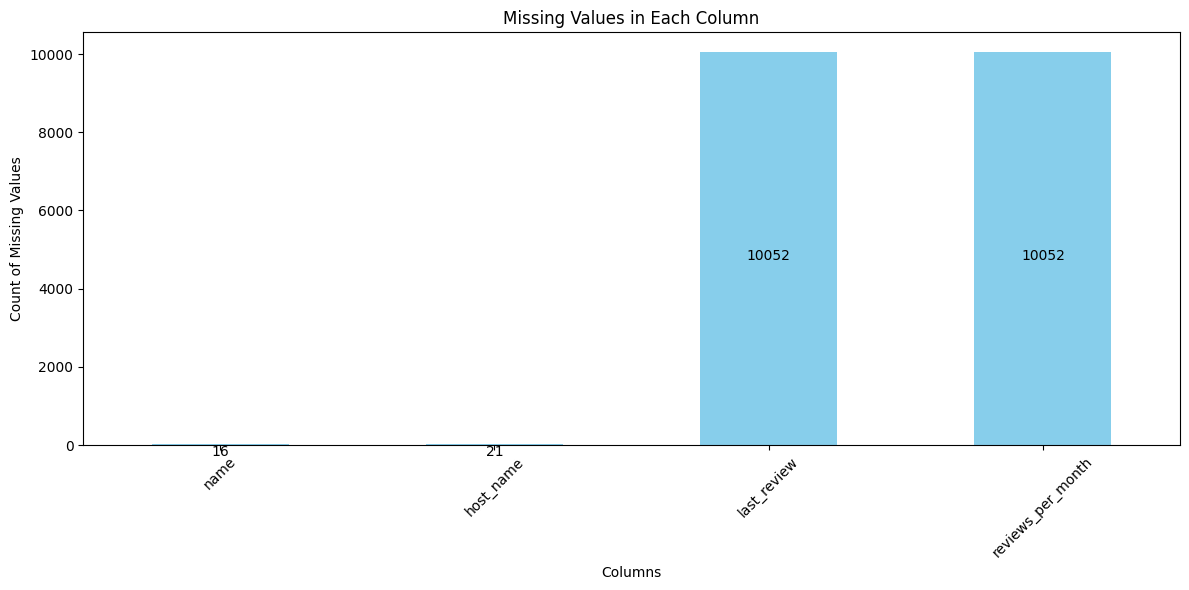

Imputed 'Unknown' in 'name' and 'host_name':
           id     name   host_id host_name neighbourhood_group  \
2854  1615764  Unknown   6676776     Peter           Manhattan   
3703  2232600  Unknown  11395220      Anna           Manhattan   
5775  4209595  Unknown  20700823     Jesse           Manhattan   
5975  4370230  Unknown  22686810   Michaël           Manhattan   
6269  4581788  Unknown  21600904     Lucie            Brooklyn   

          neighbourhood  latitude  longitude        room_type  price  \
2854  Battery Park City  40.71239  -74.01620  Entire home/apt    400   
3703       East Village  40.73215  -73.98821  Entire home/apt    200   
5775  Greenwich Village  40.73473  -73.99244  Entire home/apt    225   
5975             Nolita  40.72046  -73.99550  Entire home/apt    215   
6269       Williamsburg  40.71370  -73.94378     Private room    150   

      minimum_nights  number_of_reviews last_review  reviews_per_month  \
2854            1000                  0         NaN

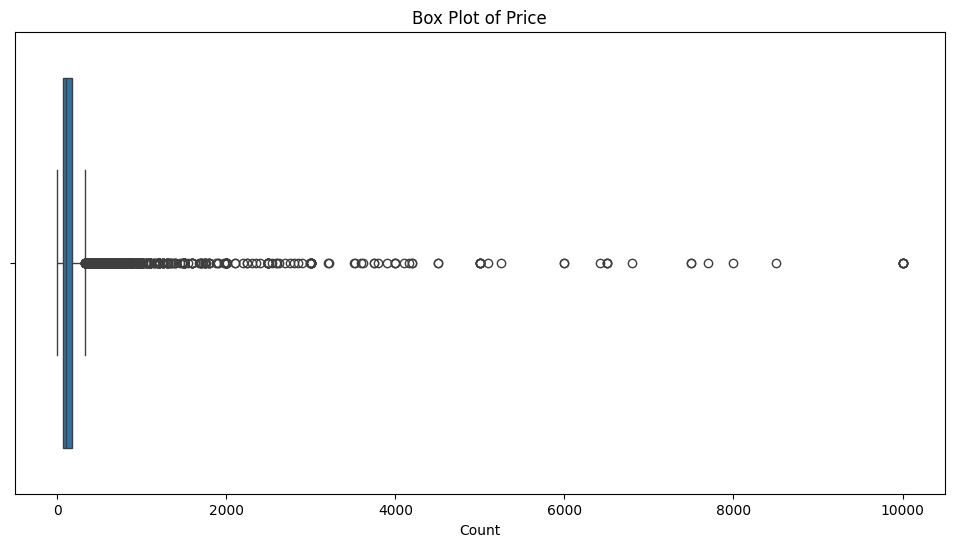


Price Bins Distribution:
price_bin
50-100     16850
100-150    10033
150-200     7200
200-300     5867
0-50        5027
300-500     2683
500+        1232
Name: count, dtype: int64


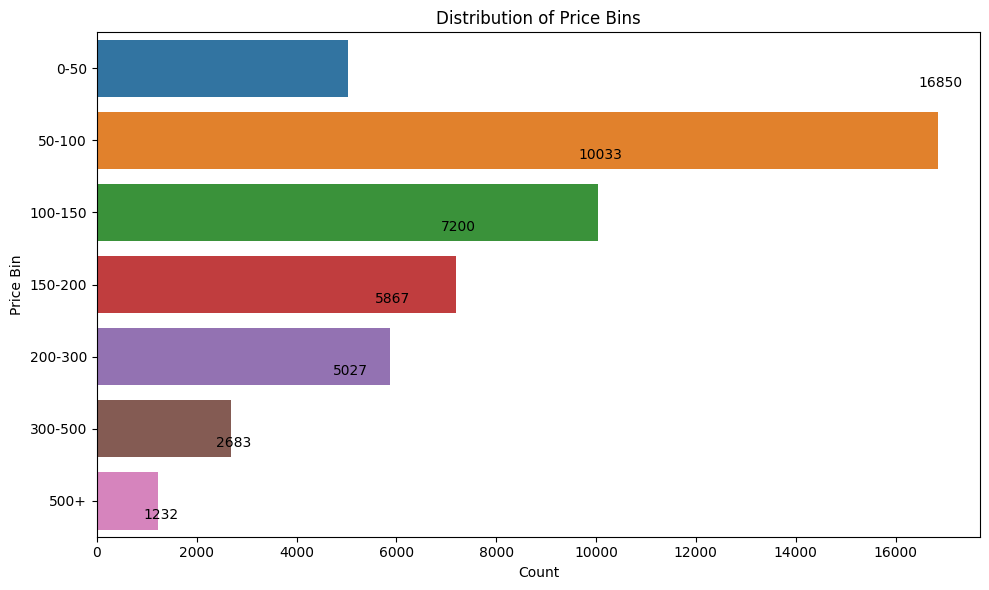

Cluster Summary Statistics:
  cluster       price                    neighbourhood_group        room_type  \
                 mean median         std                mode             mode   
0       0  115.065590   85.0  169.211821            Brooklyn     Private room   
1       1  228.019870  175.0  327.859178           Manhattan  Entire home/apt   
2       2  126.591190   95.0  210.105434           Manhattan     Private room   
3       3   98.089001   70.0  116.144154              Queens     Private room   
4       4  130.834972   99.0  173.163931            Brooklyn  Entire home/apt   

  minimum_nights number_of_reviews  
            mean              mean  
0       6.062551         24.327682  
1       9.286857         19.563000  
2       6.562137         24.130834  
3       3.736106         32.280218  
4       6.129957         24.393478  


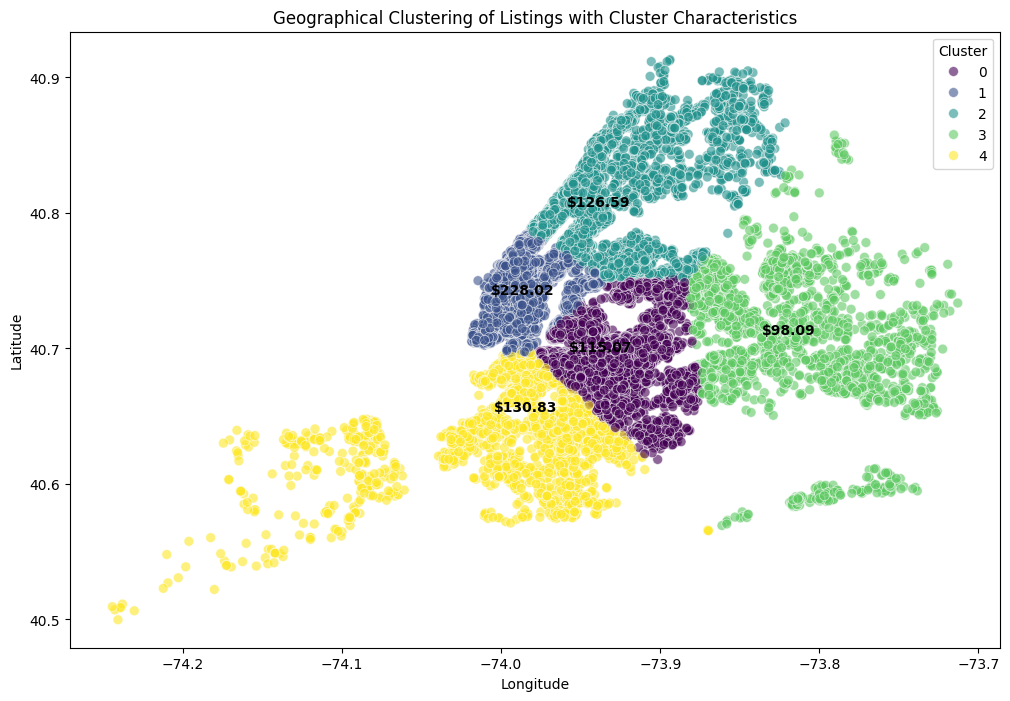

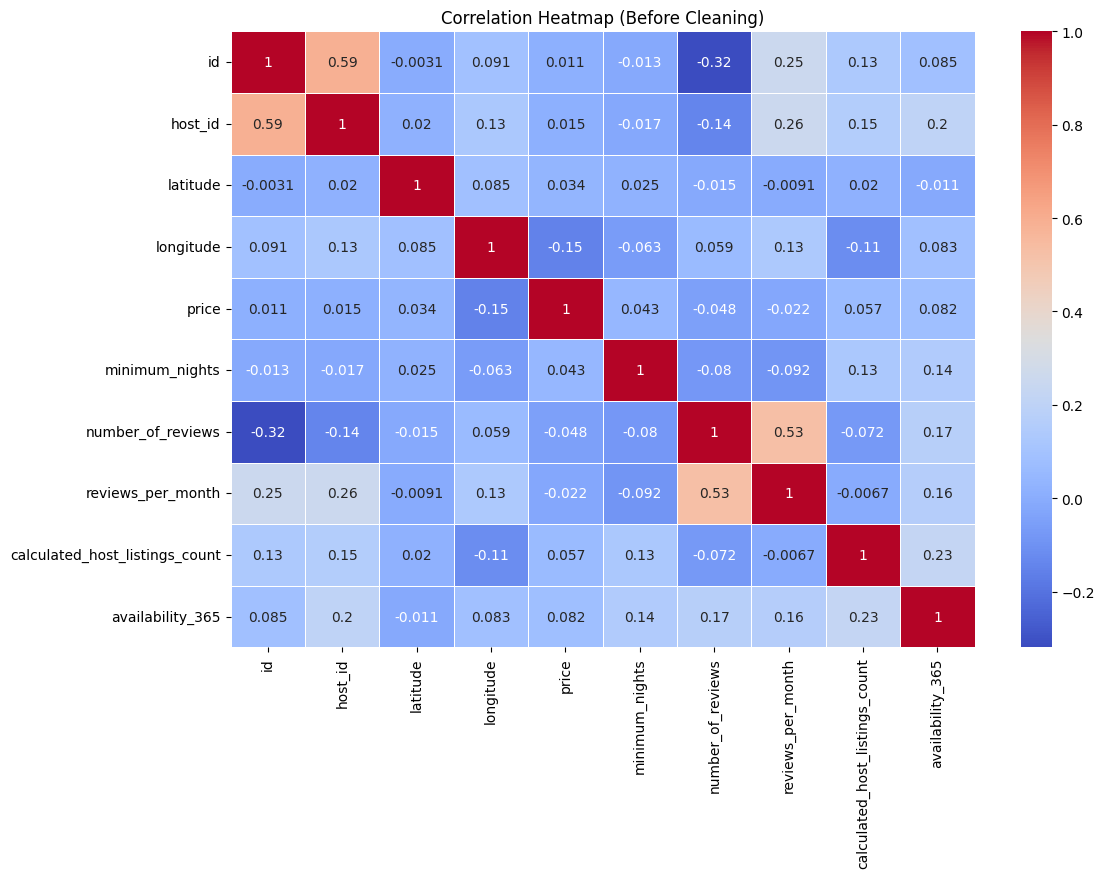

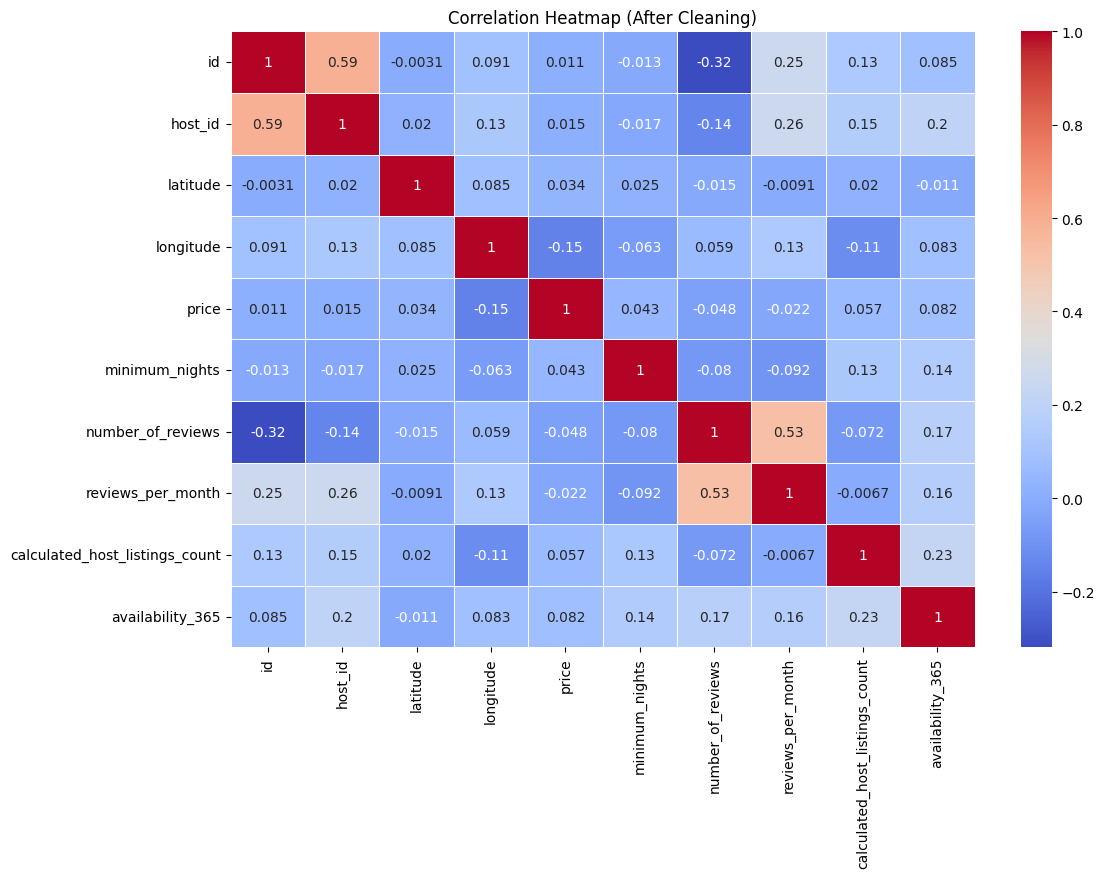

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Load the dataset
file_path = r'C:\Users\a.hatem\Desktop\MS\DP\AB_NYC_2019.csv'
data = pd.read_csv(file_path)

# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

# Visualize missing data with a bar plot
missing_values = missing_values[missing_values > 0]  # Filter out columns with no missing values
plt.figure(figsize=(12, 6))
ax = missing_values.plot(kind='bar', color='skyblue')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45)
# Annotate the bars with the count in the middle of the bars
for index, value in enumerate(missing_values):
    ax.text(index, value / 2, f'{value}', color='black', ha="center", va="top")

plt.tight_layout()
plt.show()

# Handle missing data

# Fill 'name' and 'host_name' with 'Unknown'
data['name'] = data['name'].fillna('Unknown')
data['host_name'] = data['host_name'].fillna('Unknown')

# Verify the imputation
print("Imputed 'Unknown' in 'name' and 'host_name':")
print(data[data['name'] == 'Unknown'].head())
print(data[data['host_name'] == 'Unknown'].head())

# Impute 'last_review' with the most frequent date (mode)
data['last_review'] = data['last_review'].fillna(data['last_review'].mode()[0])

# Impute 'reviews_per_month' with mean
data['reviews_per_month'] = data['reviews_per_month'].fillna(data['reviews_per_month'].mean())

# Verify no missing values remain
print("Missing Values After Cleaning:")
print(data.isnull().sum())

# Additional Check for Noisy Data
# Detect outliers in the 'price' column using the IQR method
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['price'] < (Q1 - 1.5 * IQR)) | (data['price'] > (Q3 + 1.5 * IQR))]
print(f"Detected {len(outliers)} outliers in the 'price' column.")

# Visualize outliers in the 'price' column with a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['price'])
plt.title('Box Plot of Price')
plt.xlabel('Count')
plt.show()

# Binning: Create price bins
price_bins = [0, 50, 100, 150, 200, 300, 500, 10000]
price_labels = ['0-50', '50-100', '100-150', '150-200', '200-300', '300-500', '500+']
data['price_bin'] = pd.cut(data['price'], bins=price_bins, labels=price_labels, right=False)
print("\nPrice Bins Distribution:")
print(data['price_bin'].value_counts())

# Visualize price bins distribution and annotate numbers in the middle of the bars
plt.figure(figsize=(10, 6))
bx = sns.countplot(y=data['price_bin'], hue=data['price_bin'], data=data, legend=False)

plt.title('Distribution of Price Bins')
plt.xlabel('Count')
plt.ylabel('Price Bin')

# Annotate the bars with the count at the middle of the bars
for index, value in enumerate(data['price_bin'].value_counts()):
    bx.text(value + 50, index + 0.2, f'{value}', color='black', ha="center", va="center")

plt.tight_layout()
plt.show()

# Clustering: Apply KMeans clustering based on latitude and longitude
kmeans = KMeans(n_clusters=5, random_state=0).fit(data[['latitude', 'longitude']])
data['cluster'] = kmeans.labels_

# Visualize clusters
# Summary statistics for each cluster
cluster_summary = data.groupby('cluster').agg({
    'price': ['mean', 'median', 'std'],
    'neighbourhood_group': pd.Series.mode,
    'room_type': pd.Series.mode,
    'minimum_nights': 'mean',
    'number_of_reviews': 'mean'
}).reset_index()

print("Cluster Summary Statistics:")
print(cluster_summary)

# Scatter plot with clusters
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    x='longitude', y='latitude', hue='cluster', palette='viridis', data=data, legend='full', s=50, alpha=0.6
)
plt.title('Geographical Clustering of Listings with Cluster Characteristics')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Annotate the clusters with average price
for cluster in cluster_summary['cluster']:
    avg_price = cluster_summary.loc[cluster_summary['cluster'] == cluster, ('price', 'mean')].values[0]
    plt.text(
        data[data['cluster'] == cluster]['longitude'].mean(),
        data[data['cluster'] == cluster]['latitude'].mean(),
        f'${avg_price:.2f}',
        horizontalalignment='center',
        size='medium',
        color='black',
        weight='semibold'
    )

# Customize the legend
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, title='Cluster', loc='upper right')

plt.show()

# Need to add the labels in the map key
# # Clustering: Apply KMeans clustering based on latitude and longitude
# kmeans = KMeans(n_clusters=5, random_state=0).fit(data[['latitude', 'longitude']])
# data['cluster'] = kmeans.labels_

# # Get the neighborhood group names
# neighborhood_groups = data['neighbourhood_group'].unique()

# # Visualize clusters
# # Summary statistics for each cluster
# cluster_summary = data.groupby('cluster').agg({
#     'price': ['mean', 'median', 'std'],
#     'neighbourhood_group': 'first',  # Take the first value since all should be the same in each cluster
#     'room_type': lambda x: x.mode().iloc[0],
#     'minimum_nights': 'mean',
#     'number_of_reviews': 'mean'
# }).reset_index()

# print("Cluster Summary Statistics:")
# print(cluster_summary)

# # Scatter plot with clusters
# plt.figure(figsize=(12, 8))
# scatter = sns.scatterplot(
#     x='longitude', y='latitude', hue='cluster', palette='viridis', data=data, legend='full', s=50, alpha=0.6
# )
# plt.title('Geographical Clustering of Listings with Cluster Characteristics')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')

# # Annotate the clusters with average price and neighborhood group
# for cluster in cluster_summary['cluster']:
#     avg_price = cluster_summary.loc[cluster_summary['cluster'] == cluster, ('price', 'mean')].values[0]
#     cluster_neighbourhood = cluster_summary.loc[cluster_summary['cluster'] == cluster, ('neighbourhood_group', 'first')].values[0]
    
#     plt.text(
#         data[data['cluster'] == cluster]['longitude'].mean(),
#         data[data['cluster'] == cluster]['latitude'].mean(),
#         f'${avg_price:.2f}\n{cluster_neighbourhood}',
#         horizontalalignment='center',
#         size='medium',
#         color='black',
#         weight='semibold'
#     )

# # Customize the legend with neighborhood group names
# handles, labels = scatter.get_legend_handles_labels()
# labels = [neighborhood_groups[int(label)] for label in labels]  # Map cluster indices to neighborhood group names
# plt.legend(handles=handles, labels=labels, title='Neighborhood Group', loc='upper right')

# plt.show()


# Correlation Heatmap Before Cleaning
numeric_data_before = data.select_dtypes(include=['float64', 'int64'])
corr_before = numeric_data_before.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_before, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Before Cleaning)')
plt.show()

# Correlation Heatmap After Cleaning
numeric_data_after = data.select_dtypes(include=['float64', 'int64'])
corr_after = numeric_data_after.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_after, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (After Cleaning)')
plt.show()

# # Save the cleaned dataset to an Excel file
# output_file_path = r'C:\Users\a.hatem\Desktop\MS\DP\AB_NYC_2019.csv'
# data.to_excel(output_file_path, index=False)

# print(f"Cleaned dataset saved to {output_file_path}")

Data integration and transformation:

Correlation matrix for price and number of reviews:


,number_of_reviews,price
number_of_reviews,1.000000,-0.047954
price,-0.047954,1.000000


Pearson's correlation coefficient: -0.047954226582661415


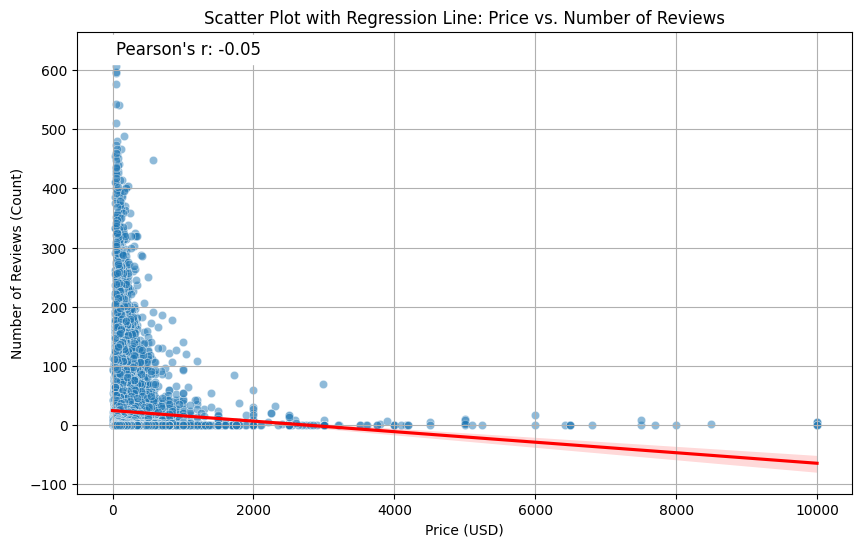

In [11]:
# Is there a correlation between price and the number of reviews received?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load the dataset
dataset = pd.read_csv(r'C:\Users\a.hatem\Desktop\MS\DP\AB_NYC_2019.csv')

# Select relevant columns
special_char_columns = ['number_of_reviews', 'price']

# Calculate the correlation matrix
correlation_matrix = dataset[special_char_columns].corr()

# Calculate Pearson's correlation coefficient
pearson_corr, _ = pearsonr(dataset['price'], dataset['number_of_reviews'])

# Print the correlation matrix and coefficients
print("Correlation matrix for price and number of reviews:")
display(correlation_matrix)
print(f"Pearson's correlation coefficient: {pearson_corr}")

# Plotting the scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset, x='price', y='number_of_reviews', alpha=0.5)
sns.regplot(data=dataset, x='price', y='number_of_reviews', scatter=False, color='red')

# Adding titles and labels with units
plt.title('Scatter Plot with Regression Line: Price vs. Number of Reviews')
plt.xlabel('Price (USD)')
plt.ylabel('Number of Reviews (Count)')
plt.grid(True)

# Annotate the plot with correlation coefficients
plt.annotate(f"Pearson's r: {pearson_corr:.2f}", xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, backgroundcolor='white')
plt.show()


,Neighbourhood Group,Average Availability,Rank
4,Staten Island,199.678284,1.0
0,Bronx,165.758937,2.0
3,Queens,144.451818,3.0
2,Manhattan,111.979410,4.0
1,Brooklyn,100.232292,5.0


C:\Users\a.hatem\AppData\Local\Temp\ipykernel_2816\794756373.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=top_neighbourhoods, x='Average Availability', y='Neighbourhood Group', palette='viridis')


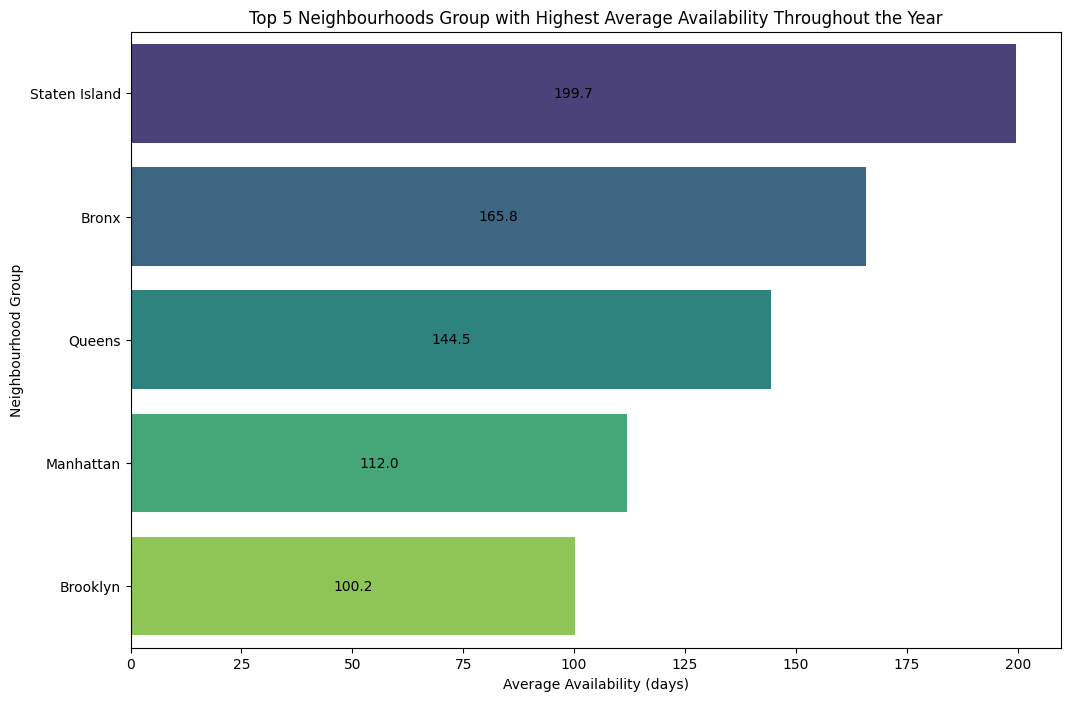

In [27]:
# Which neighborhood group has the highest average availability throughout the year?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Load the dataset
dataset = pd.read_csv(r'C:\Users\a.hatem\Desktop\MS\DP\AB_NYC_2019.csv')

# Group by neighbourhood group and calculate the average availability
neighbourhood_availability = dataset.groupby('neighbourhood_group')['availability_365'].mean().reset_index()

# Rename the columns for clarity
neighbourhood_availability.columns = ['Neighbourhood Group', 'Average Availability']

# Rank the neighbourhoods group by average availability
neighbourhood_availability['Rank'] = neighbourhood_availability['Average Availability'].rank(ascending=False)

# Sort the data by average availability in descending order
sorted_neighbourhoods = neighbourhood_availability.sort_values(by='Average Availability', ascending=False)

# Display the top 5 neighbourhoods group with the highest average availability
top_neighbourhoods = sorted_neighbourhoods.head(5)
display(top_neighbourhoods)

# Plot the top neighbourhoods group
plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=top_neighbourhoods, x='Average Availability', y='Neighbourhood Group', palette='viridis')

# Adding titles and labels
plt.title('Top 5 Neighbourhoods Group with Highest Average Availability Throughout the Year')
plt.xlabel('Average Availability (days)')
plt.ylabel('Neighbourhood Group')

# Annotate the bars with the average availability in the middle of the bars
for index, value in enumerate(top_neighbourhoods['Average Availability']):
    barplot.text(value / 2, index, f'{value:.1f}', color='black', ha="center", va="center")


# Show the plot
plt.show()


Data Transformation Technique

,neighbourhood_group,price
0,Bronx,87.496792
1,Brooklyn,124.383207
2,Manhattan,196.875814
3,Queens,99.517649
4,Staten Island,114.812332


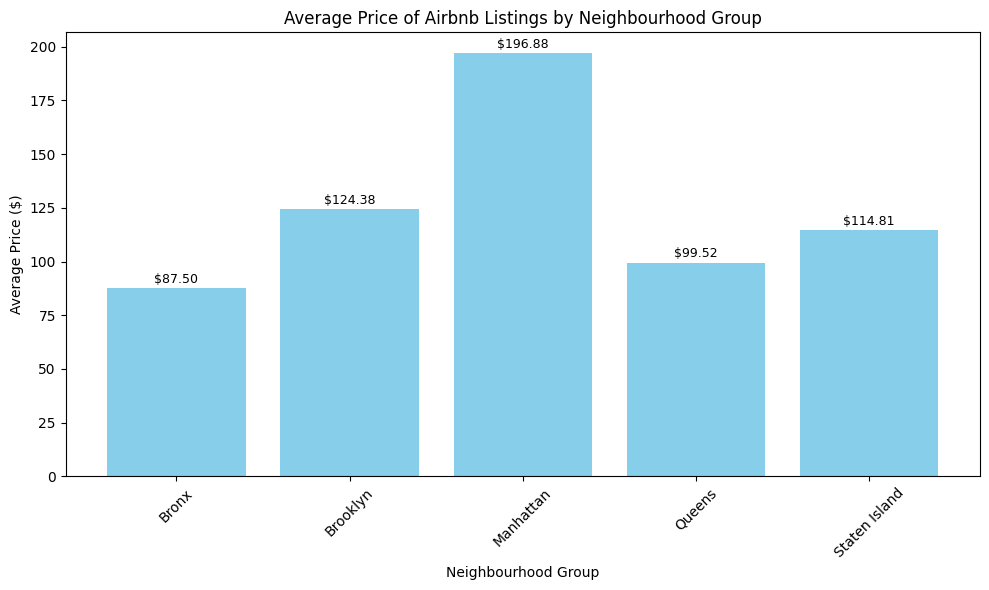

In [61]:
# # 1. What is the average price of Airbnb listings in each neighbourhood group?
# # Technique: Aggregation

import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
dataset = pd.read_csv(r'C:\Users\a.hatem\Desktop\MS\DP\AB_NYC_2019.csv')

# Aggregation: Calculate average price by neighbourhood group
avg_price_neighbourhood = dataset.groupby('neighbourhood_group')['price'].mean().reset_index()
display(avg_price_neighbourhood)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_price_neighbourhood['neighbourhood_group'], avg_price_neighbourhood['price'], color='skyblue')

# Adding labels and title
plt.title('Average Price of Airbnb Listings by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)

# Displaying the values on top of each bar
for index, row in avg_price_neighbourhood.iterrows():
    plt.text(index, row['price']+1, '${:.2f}'.format(row['price']), ha='center', va='bottom', fontsize=9)

# Show plot
plt.tight_layout()
plt.show()


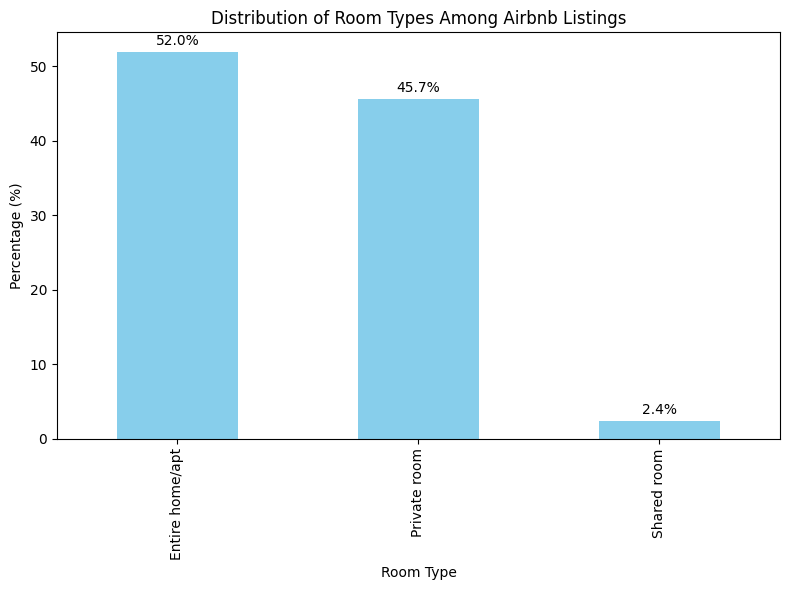

In [53]:
# # 2. What is the distribution of room types among Airbnb listings?
# # Technique: Discretization

import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (replace 'file_path' with actual file path)
dataset = pd.read_csv(r'C:\Users\a.hatem\Desktop\MS\DP\AB_NYC_2019.csv')

# Discretization: Convert room type into categories and calculate distribution
room_type_distribution = dataset['room_type'].value_counts(normalize=True) * 100

# Plotting the distribution of room types
plt.figure(figsize=(8, 6))
room_type_distribution.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.title('Distribution of Room Types Among Airbnb Listings')
plt.xlabel('Room Type')
plt.ylabel('Percentage (%)')

# Adding percentage labels on top of each bar
for i, percentage in enumerate(room_type_distribution):
    plt.text(i, percentage + 0.5, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()



C:\Users\a.hatem\AppData\Local\Temp\ipykernel_2816\1906883429.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_counts = dataset.groupby(['price_category', 'reviews_category']).size().unstack(fill_value=0)


reviews_category,0-10,11-20,21-50,51-100,100+
price_category,,,,,
0-100,9964,2646,3225,2061,1493
101-500,9914,2601,2958,1866,1483
501-1000,320,58,92,28,17
1000+,69,16,15,5,2


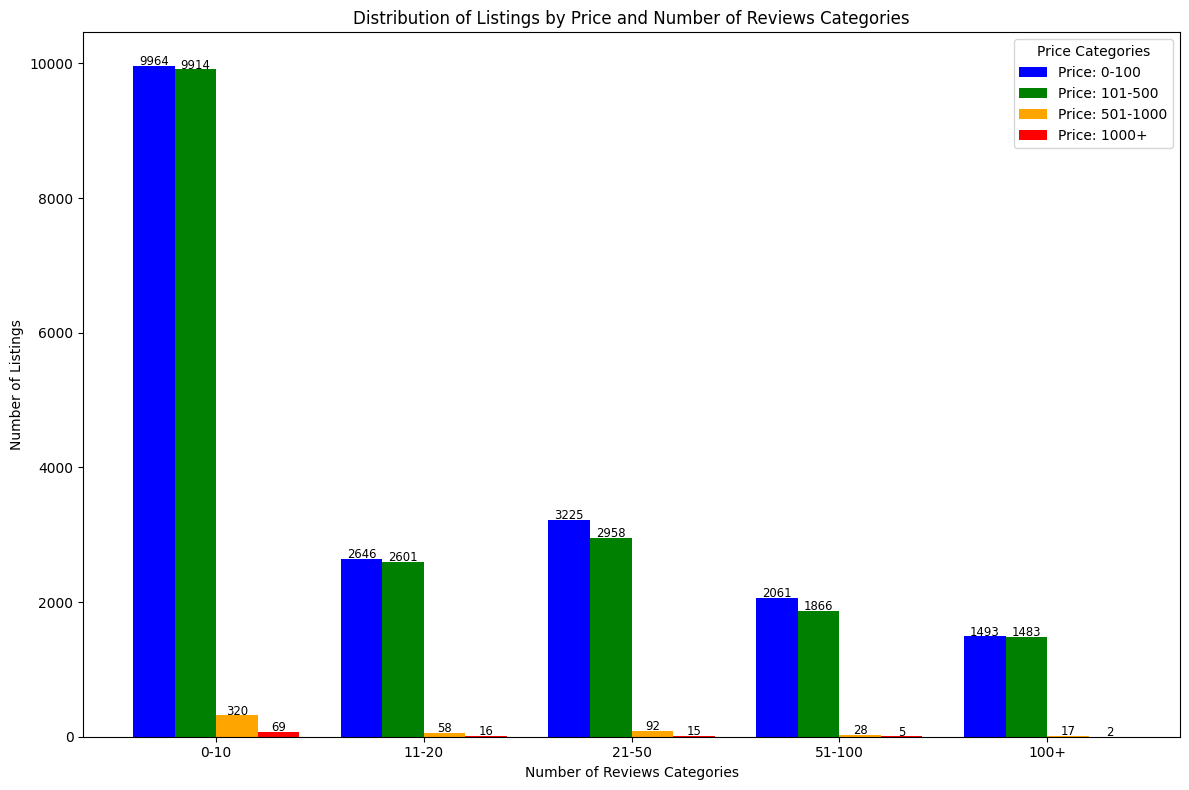

In [59]:
# 3. Is there a correlation between price and the number of reviews received?
# Technique: Generalization

import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
dataset = pd.read_csv('C:/Users/a.hatem/Desktop/MS/DP/AB_NYC_2019.csv')

# Define bins and labels for price and number of reviews
price_bins = [0, 100, 500, 1000, float('inf')]
review_bins = [0, 10, 20, 50, 100, float('inf')]
price_labels = ['0-100', '101-500', '501-1000', '1000+']
review_labels = ['0-10', '11-20', '21-50', '51-100', '100+']

# Bin and categorize price and number of reviews
dataset['price_category'] = pd.cut(dataset['price'], bins=price_bins, labels=price_labels)
dataset['reviews_category'] = pd.cut(dataset['number_of_reviews'], bins=review_bins, labels=review_labels)

# Calculate counts for each combination of price and reviews categories
category_counts = dataset.groupby(['price_category', 'reviews_category']).size().unstack(fill_value=0)
display(category_counts)

# Plotting the grouped bar chart
plt.figure(figsize=(12, 8))

# Define colors for each price category
colors = ['blue', 'green', 'orange', 'red']

# Loop through each price category to plot bars with respective colors
for i, (price_cat, row) in enumerate(category_counts.iterrows()):
    plt.bar([x + i * 0.2 for x in range(len(review_labels))], row, width=0.2, label=f'Price: {price_cat}', color=colors[i])

# Adding labels and title
plt.title('Distribution of Listings by Price and Number of Reviews Categories')
plt.xlabel('Number of Reviews Categories')
plt.ylabel('Number of Listings')

# Customize x-axis ticks and labels
plt.xticks([x + 0.3 for x in range(len(review_labels))], review_labels)

# Add legend and adjust layout
plt.legend(title='Price Categories', loc='upper right')
plt.tight_layout()

# Annotate with total counts for each bar
for i, (price_cat, row) in enumerate(category_counts.iterrows()):
    for j, count in enumerate(row):
        plt.annotate(f'{count}', xy=(j + i * 0.2, count + 10), ha='center', fontsize='small')

# Show plot
plt.show()


Data Reduction

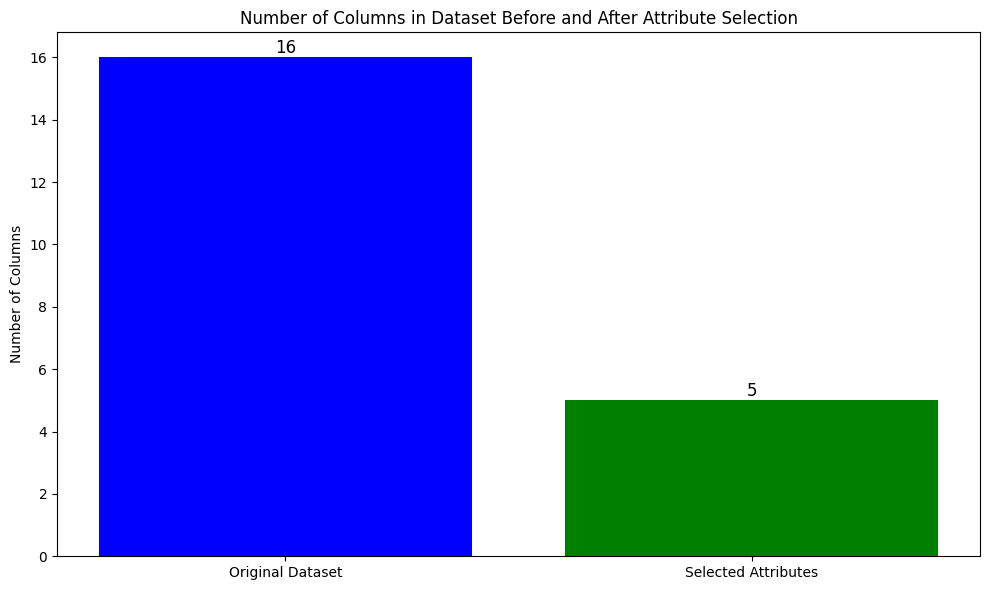

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the original dataset
dataset = pd.read_csv('C:/Users/a.hatem/Desktop/MS/DP/AB_NYC_2019.csv')

# Define the selected attributes
selected_attributes = ['neighbourhood_group', 'room_type', 'price', 'number_of_reviews', 'availability_365']

# Calculate number of columns before and after selection
num_columns_original = dataset.shape[1]  # Total columns in the original dataset
num_columns_selected = len(selected_attributes)  # Number of selected attributes

# Plotting the number of columns
plt.figure(figsize=(10, 6))

bars = plt.bar(['Original Dataset', 'Selected Attributes'], [num_columns_original, num_columns_selected], color=['blue', 'green'])

# Adding labels and title
plt.title('Number of Columns in Dataset Before and After Attribute Selection')
plt.ylabel('Number of Columns')

# Adding values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()
